# Fastest Lap Data
A Jupyter notebook looking at the fastest laps from each race. Using data from [Formula 1](https://www.formula1.com/en/results.html/2022/races.html)

The DataFrame 'fastest_lap' contains the mean (average) of the fastest laps of each driver in each race.

CSV files can be found in:
- data/fastest-laps

__HAVE YOU READ THE README FILE? PLEASE DO BEFORE USING THIS JUPYTER NOTEBOOK!__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import re
from datetime import datetime
import time

In [2]:
%matplotlib inline

In [3]:
cf.go_offline() #allows to use cufflinks offline

# Fastest Lap DataFrame management

In [122]:
fastest_lap = pd.DataFrame()

fastest_lap = fastest_lap.assign(NO = '', DRIVER = '', CAR = '', RACE = '', FL = '', AVG_SPEED = '')
# rename the column header
#fastest_lap.columns = fastest_lap.columns.str.replace('SPEED', 'AVG SPEED')

fastest_lap.head()

,NO,DRIVER,CAR,RACE,FL,AVG_SPEED


In [62]:
# convert column to timedelta
fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])

In [116]:
# get total seconds
fastest_lap['FL'] = fastest_lap['FL'].dt.total_seconds()

AttributeError: Can only use .dt accessor with datetimelike values

In [12]:
fastest_lap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 18 to -1
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NO         20 non-null     int64  
 1   DRIVER     20 non-null     object 
 2   CAR        20 non-null     object 
 3   RACE       20 non-null     object 
 4   FL         20 non-null     float64
 5   AVG_SPEED  20 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ KB


In [177]:
fastest_lap.to_csv('data/compiled-data/fastest-laps.csv')

# Adding Fastest Laps data
This function will add the fastest lap data for a race to a data frame.

In [126]:
def addFastestLaps(fl_country, country_name, fastest_lap, commit_mode):
    driver_count = 0

    print("Adding data for " + country_name)
    print("Commit mode is set to " + str(commit_mode))
    try:
        while driver_count < len(fl_country.index):
            time = fl_country.loc[driver_count, 'Time']
            driverNo = fl_country.loc[driver_count, 'No']
            name = fl_country.loc[driver_count, 'Driver']
            avg_speed = fl_country.loc[driver_count, 'Avg Speed']
            car = fl_country.loc[driver_count, 'Car']
            # shift the index
            fastest_lap.index = fastest_lap.index + 1
            if time == 'DNF':
                driver_count += 1
            else:
                driver_count += 1
                #time = re.sub(r'[^0-9.]', '', time)
                #timeFloat = float(time)
                formattedTime = datetime.strptime(time,'%M:%S.%f')
                formattedTime = formattedTime.strftime('%H:%M:%S.%f')[:-5]
                #finalTime = timeFloat + fastest_lap_bahrain_time.strftime('%M:%S.%f')[:-3]
            if(commit_mode):
                # add row
                fastest_lap.loc[-1] = [driverNo, name, car, country_name, formattedTime, avg_speed]
                # CONVERT FL COLUMN TO TIMEDELTA FORMAT
                fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
            else:
                fastest_lap['FL'] = pd.to_timedelta(fastest_lap['FL'])
                print(driverNo, name, car, country_name, formattedTime, avg_speed)

    except:
        print("ERROR! Double check the arguments provided for the function.\nHave you imported the race data CSV?\nHas the fastest_lap data frame been created?")

# Bahrain DataFrame management

In [119]:
fl_bahrain = pd.read_csv('data/fastest-lap/fl-bahrain.csv')
fl_bahrain.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,16,Charles Leclerc,Ferrari,51,19:31:35,01:34.6,206.018
1,2,1,Max Verstappen,Red Bull Racing RBPT,51,19:31:37,01:35.4,204.140
2,3,55,Carlos Sainz,Ferrari,52,19:33:13,01:35.7,203.501
3,4,11,Sergio Perez,Red Bull Racing RBPT,52,19:33:14,01:36.1,202.762
4,5,44,Lewis Hamilton,Mercedes,53,19:34:51,01:36.2,202.469


In [128]:
addFastestLaps(fl_bahrain, "BAHRAIN", fastest_lap, True)

Adding data for BAHRAIN
Commit mode is set to True


In [8]:
# get data by specific driver
#fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']

In [9]:
#calculate the mean of the fastest laps and assign to variable
#fl_mean = fastest_lap['FL'].mean()

In [10]:
# display total seconds
#fl_mean.total_seconds()

In [11]:
#fastest_lap.head()

# Saudi Arabia DataFrame management

In [12]:
fl_saudi_arabia = pd.read_csv('data/fastest-lap/fl-saudi-arabia.csv')
fl_saudi_arabia.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,16,Charles Leclerc,Ferrari,48,21:24:43,01:31.6,242.556
1,2,1,Max Verstappen,Red Bull Racing RBPT,50,21:27:46,01:31.8,242.191
2,3,55,Carlos Sainz,Ferrari,48,21:24:50,01:31.9,241.841
3,4,11,Sergio Perez,Red Bull Racing RBPT,46,21:21:47,01:32.0,241.481
4,5,4,Lando Norris,McLaren Mercedes,46,21:22:26,01:32.8,239.629


In [129]:
addFastestLaps(fl_saudi_arabia, "SAUDI ARABIA", fastest_lap, True)

Adding data for SAUDI ARABIA
Commit mode is set to True


# Australia DataFrame management

In [130]:
fl_australia = pd.read_csv('data/fastest-lap/fl-australia.csv')
fl_australia.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,16,Charles Leclerc,Ferrari,58,16:30:59,01:20.3,236.740
1,2,14,Fernando Alonso,Alpine Renault,57,16:31:30,01:20.8,235.024
2,3,11,Sergio Perez,Red Bull Racing RBPT,58,16:31:20,01:21.1,234.305
3,4,63,George Russell,Mercedes,53,16:24:35,01:21.5,233.152
4,5,77,Valtteri Bottas,Alfa Romeo Ferrari,54,16:26:39,01:21.7,232.707


In [131]:
addFastestLaps(fl_australia, "AUSTRALIA", fastest_lap, True)

Adding data for AUSTRALIA
Commit mode is set to True


# Italy DataFrame Management

In [132]:
fl_italy = pd.read_csv('data/fastest-lap/fl-italy.csv')
fl_italy.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,1,Max Verstappen,Red Bull Racing RBPT,55,16:24:32,01:18.4,225.281
1,2,16,Charles Leclerc,Ferrari,63,16:36:07,01:18.6,224.914
2,3,11,Sergio Perez,Red Bull Racing RBPT,52,16:20:46,01:18.9,223.845
3,4,47,Mick Schumacher,Haas Ferrari,55,16:26:33,01:19.0,223.704
4,5,22,Yuki Tsunoda,AlphaTauri RBPT,61,16:33:29,01:20.5,219.412


In [133]:
addFastestLaps(fl_italy, "ITALY", fastest_lap, True)

Adding data for ITALY
Commit mode is set to True


# Miami DataFrame Management

In [134]:
fl_miami = pd.read_csv('data/fastest-lap/fl-miami.csv')
fl_miami.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,1,Max Verstappen,Red Bull Racing RBPT,54,17:03:04,01:31.4,213.255
1,2,16,Charles Leclerc,Ferrari,53,17:01:34,01:31.5,212.959
2,3,55,Carlos Sainz,Ferrari,56,17:06:15,01:31.8,212.258
3,4,11,Sergio Perez,Red Bull Racing RBPT,54,17:03:13,01:31.8,212.191
4,5,63,George Russell,Mercedes,56,17:06:25,01:32.2,211.325


In [135]:
addFastestLaps(fl_miami, "MIAMI", fastest_lap, True)

Adding data for MIAMI
Commit mode is set to True


# Spain DataFrame Management

In [136]:
fl_spain = pd.read_csv('data/fastest-lap/fl-spain.csv')
fl_spain.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,11,Sergio Perez,Red Bull Racing RBPT,55,16:25:00,01:24.1,200.099
1,2,44,Lewis Hamilton,Mercedes,51,16:19:36,01:24.3,199.755
2,3,63,George Russell,Mercedes,53,16:22:13,01:24.6,198.851
3,4,1,Max Verstappen,Red Bull Racing RBPT,46,16:11:38,01:25.5,196.943
4,5,4,Lando Norris,McLaren Mercedes,53,16:23:01,01:25.6,196.568


In [137]:
addFastestLaps(fl_spain, "SPAIN", fastest_lap, True)

Adding data for SPAIN
Commit mode is set to True


# Monaco DataFrame Management

In [138]:
fl_monaco = pd.read_csv('data/fastest-lap/fl-monaco.csv')
fl_monaco.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,4,Lando Norris,McLaren Mercedes,55,17:50:21,01:14.7,160.834
1,2,22,Yuki Tsunoda,AlphaTauri RBPT,61,17:59:29,01:15.3,159.465
2,3,14,Fernando Alonso,Alpine Renault,50,17:44:03,01:15.9,158.314
3,4,11,Sergio Perez,Red Bull Racing RBPT,46,17:38:05,01:16.0,158.010
4,5,1,Max Verstappen,Red Bull Racing RBPT,47,17:39:26,01:16.1,157.960


In [139]:
addFastestLaps(fl_monaco, "MONACO", fastest_lap, True)

Adding data for MONACO
Commit mode is set to True


# Azerbaijan DataFrame Management

In [140]:
fl_azerbaijan = pd.read_csv('data/fastest-lap/fl-azerbaijan.csv')
fl_azerbaijan.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,11,Sergio Perez,Red Bull Racing RBPT,36,16:11:32,01:46.0,203.787
1,2,1,Max Verstappen,Red Bull Racing RBPT,50,16:36:14,01:46.1,203.779
2,3,44,Lewis Hamilton,Mercedes,39,16:17:36,01:47.0,201.887
3,4,63,George Russell,Mercedes,42,16:22:38,01:47.2,201.636
4,5,22,Yuki Tsunoda,AlphaTauri RBPT,42,16:23:46,01:47.5,200.987


In [141]:
addFastestLaps(fl_azerbaijan, "AZERBAIJAN", fastest_lap, True)

Adding data for AZERBAIJAN
Commit mode is set to True


# Canada DataFrame Management

In [142]:
fl_canada = pd.read_csv('data/fastest-lap/fl-canada.csv')
fl_canada.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,55,Carlos Sainz,Ferrari,63,15:30:43,01:15.7,207.258
1,2,1,Max Verstappen,Red Bull Racing RBPT,64,15:31:59,01:15.8,207.012
2,3,16,Charles Leclerc,Ferrari,62,15:29:37,01:15.9,206.843
3,4,44,Lewis Hamilton,Mercedes,69,15:38:25,01:16.2,206.120
4,5,63,George Russell,Mercedes,63,15:30:51,01:16.4,205.443


In [143]:
addFastestLaps(fl_canada, "CANADA", fastest_lap, True)

Adding data for CANADA
Commit mode is set to True


# Great Britain DataFrame Management

In [144]:
fl_gb = pd.read_csv('data/fastest-lap/fl-greatbritain.csv')
fl_gb.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,44,Lewis Hamilton,Mercedes,52,17:21:12,01:30.5,234.312
1,2,55,Carlos Sainz,Ferrari,44,17:08:55,01:30.8,233.530
2,3,11,Sergio Perez,Red Bull Racing RBPT,47,17:13:33,01:30.9,233.212
3,4,16,Charles Leclerc,Ferrari,52,17:21:14,01:31.3,232.330
4,5,14,Fernando Alonso,Alpine Renault,47,17:13:35,01:31.6,231.501


In [145]:
addFastestLaps(fl_gb, "GREAT BRITAIN", fastest_lap, True)

Adding data for GREAT BRITAIN
Commit mode is set to True


# Austria DataFrame Management

In [146]:
fl_austria = pd.read_csv('data/fastest-lap/fl-austria.csv')
fl_gb.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,44,Lewis Hamilton,Mercedes,52,17:21:12,01:30.5,234.312
1,2,55,Carlos Sainz,Ferrari,44,17:08:55,01:30.8,233.530
2,3,11,Sergio Perez,Red Bull Racing RBPT,47,17:13:33,01:30.9,233.212
3,4,16,Charles Leclerc,Ferrari,52,17:21:14,01:31.3,232.330
4,5,14,Fernando Alonso,Alpine Renault,47,17:13:35,01:31.6,231.501


In [147]:
addFastestLaps(fl_austria, "AUSTRIA", fastest_lap, True)

Adding data for AUSTRIA
Commit mode is set to True


# France DataFrame Management

In [148]:
fl_france = pd.read_csv('data/fastest-lap/fl-france.csv')
fl_france.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,55,Carlos Sainz,Ferrari,51,16:30:58,01:35.8,219.575
1,2,1,Max Verstappen,Red Bull Racing RBPT,30,15:55:33,01:37.5,215.724
2,3,63,George Russell,Mercedes,51,16:30:42,01:37.5,215.598
3,4,44,Lewis Hamilton,Mercedes,30,15:55:37,01:37.7,215.333
4,5,11,Sergio Perez,Red Bull Racing RBPT,45,16:20:19,01:37.8,215.086


In [149]:
addFastestLaps(fl_france, "FRANCE", fastest_lap, True)

Adding data for FRANCE
Commit mode is set to True


# Hungary

In [150]:
fl_hungary = pd.read_csv('data/fastest-lap/fl-hungary.csv')
fl_hungary.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,44,Lewis Hamilton,Mercedes,57,16:24:16,1:21.386,193.787
1,2,16,Charles Leclerc,Ferrari,57,16:24:32,1:21.622,193.227
2,3,11,Sergio Perez,Red Bull Racing RBPT,44,16:06:30,1:21.940,192.477
3,4,55,Carlos Sainz,Ferrari,51,16:15:54,1:22.000,192.336
4,5,24,Zhou Guanyu,Alfa Romeo Ferrari,58,16:27:27,1:22.029,192.268


In [151]:
addFastestLaps(fl_hungary, "HUNGARY", fastest_lap, True)

Adding data for HUNGARY
Commit mode is set to True


# Belguim

In [152]:
fl_belguim = pd.read_csv('data/fastest-lap/fl-belguim.csv')
fl_belguim.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,1,Max Verstappen,Red Bull Racing RBPT,32,16:07:14,1:49.354,230.575
1,2,16,Charles Leclerc,Ferrari,44,16:30:47,1:49.984,229.255
2,3,11,Sergio Perez,Red Bull Racing RBPT,29,16:01:51,1:50.764,227.640
3,4,63,George Russell,Mercedes,31,16:05:48,1:50.793,227.581
4,5,4,Lando Norris,McLaren Mercedes,31,16:06:37,1:51.678,225.777


In [153]:
addFastestLaps(fl_belguim, "BELGUIM", fastest_lap, True)

Adding data for BELGUIM
Commit mode is set to True


# Netherlands

In [154]:
fl_netherlands = pd.read_csv('data/fastest-lap/fl-netherlands.csv')
fl_netherlands.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,1,Max Verstappen,Red Bull Racing RBPT,62,16:27:18,1:13.652,208.173
1,2,63,George Russell,Mercedes,72,16:39:43,1:13.671,208.119
2,3,44,Lewis Hamilton,Mercedes,54,16:13:20,1:13.854,207.604
3,4,14,Fernando Alonso,Alpine Renault,51,16:10:16,1:14.144,206.792
4,5,11,Sergio Perez,Red Bull Racing RBPT,63,16:28:38,1:14.404,206.069


In [155]:
addFastestLaps(fl_netherlands, "NETHERLANDS", fastest_lap, True)

Adding data for NETHERLANDS
Commit mode is set to True


# Italy 2

In [156]:
fl_italy2 = pd.read_csv('data/fastest-lap/fl-italy2.csv')
fl_italy2.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,11,Sergio Perez,Red Bull Racing RBPT,46,16:11:02,1:24.030,248.182
1,2,16,Charles Leclerc,Ferrari,38,15:58:50,1:24.336,247.282
2,3,44,Lewis Hamilton,Mercedes,43,16:06:39,1:24.434,246.995
3,4,55,Carlos Sainz,Ferrari,41,16:03:26,1:24.446,246.960
4,5,4,Lando Norris,McLaren Mercedes,43,16:06:44,1:24.718,246.167


In [157]:
addFastestLaps(fl_italy2, "ITALY2", fastest_lap, True)

Adding data for ITALY2
Commit mode is set to True


# Singapore

In [158]:
fl_singapore = pd.read_csv('data/fastest-lap/fl-singapore.csv')
fl_singapore.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,63,George Russell,Mercedes,54,23:05:33,1:46.458,171.211
1,2,11,Sergio Perez,Red Bull Racing RBPT,57,23:07:32,1:48.165,168.509
2,3,55,Carlos Sainz,Ferrari,59,23:11:26,1:48.414,168.122
3,4,16,Charles Leclerc,Ferrari,54,23:02:11,1:48.753,167.598
4,5,1,Max Verstappen,Red Bull Racing RBPT,52,22:59:20,1:49.142,167.000


In [159]:
addFastestLaps(fl_singapore, "SINGAPORE", fastest_lap, True)

Adding data for SINGAPORE
Commit mode is set to True


# Japan

In [160]:
fl_japan = pd.read_csv('data/fastest-lap/fl-japan.csv')
fl_japan.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,24,Zhou Guanyu,Alfa Romeo Ferrari,20,16:52:17,1:44.411,200.220
1,2,14,Fernando Alonso,Alpine Renault,25,17:00:46,1:44.412,200.218
2,3,16,Charles Leclerc,Ferrari,10,16:33:12,1:44.489,200.070
3,4,1,Max Verstappen,Red Bull Racing RBPT,10,16:33:08,1:44.911,199.266
4,5,18,Lance Stroll,Aston Martin Aramco Mercedes,21,16:53:56,1:45.205,198.709


In [161]:
addFastestLaps(fl_japan, "JAPAN", fastest_lap, True)

Adding data for JAPAN
Commit mode is set to True


# USA

In [162]:
fl_usa = pd.read_csv('data/fastest-lap/fl-usa.csv')
fl_usa.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,63,George Russell,Mercedes,56,15:46:36,1:38.788,200.902
1,2,1,Max Verstappen,Red Bull Racing RBPT,37,15:14:07,1:39.541,199.383
2,3,11,Sergio Perez,Red Bull Racing RBPT,44,15:25:54,1:39.563,199.339
3,4,16,Charles Leclerc,Ferrari,37,15:14:06,1:39.731,199.003
4,5,44,Lewis Hamilton,Mercedes,45,15:27:25,1:39.830,198.805


In [163]:
addFastestLaps(fl_usa, "USA", fastest_lap, True)

Adding data for USA
Commit mode is set to True


# Mexico

In [164]:
fl_mexico = pd.read_csv('data/fastest-lap/fl-mexico.csv')
fl_mexico.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,63,George Russell,Mercedes,71,15:42:32,1:20.153,193.310
1,2,11,Sergio Perez,Red Bull Racing RBPT,30,14:45:14,1:21.775,189.476
2,3,3,Daniel Ricciardo,McLaren Mercedes,48,15:11:17,1:22.022,188.905
3,4,1,Max Verstappen,Red Bull Racing RBPT,36,14:53:18,1:22.046,188.850
4,5,44,Lewis Hamilton,Mercedes,32,14:47:56,1:22.062,188.813


In [165]:
addFastestLaps(fl_mexico, "MEXICO", fastest_lap, True)

Adding data for MEXICO
Commit mode is set to True


# Brazil

In [166]:
fl_brazil = pd.read_csv('data/fastest-lap/fl-brazil.csv')
fl_brazil.head()

,Pos,No,Driver,Car,Lap,Time of day,Time,Avg Speed
0,1,63,George Russell,Mercedes,61,16:28:58,1:13.785,210.237
1,2,44,Lewis Hamilton,Mercedes,63,16:31:27,1:13.942,209.791
2,3,55,Carlos Sainz,Ferrari,65,16:33:58,1:13.953,209.760
3,4,14,Fernando Alonso,Alpine Renault,62,16:30:18,1:14.164,209.163
4,5,1,Max Verstappen,Red Bull Racing RBPT,64,16:32:49,1:14.195,209.076


In [167]:
addFastestLaps(fl_brazil, 'BRAZIL', fastest_lap, True)

Adding data for BRAZIL
Commit mode is set to True


# Plotting Work

<AxesSubplot: title={'center': 'Max Verstappen'}, xlabel='RACE'>

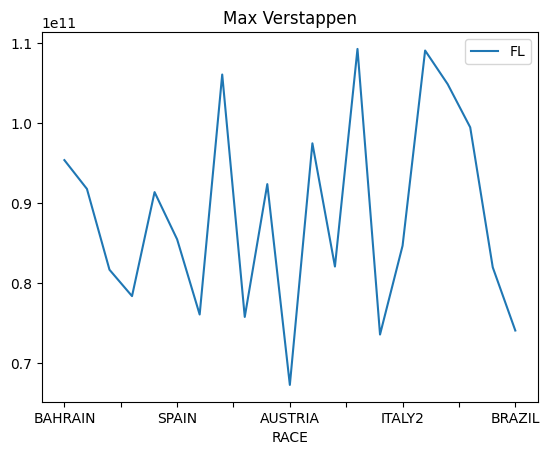

In [168]:
#avg speed
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen'].plot.line(x='RACE', y='FL', title='Max Verstappen')

In [169]:
fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']['FL']

403   0 days 00:01:35.400000
383   0 days 00:01:31.800000
361   0 days 00:01:21.700000
347   0 days 00:01:18.400000
328   0 days 00:01:31.400000
305   0 days 00:01:25.500000
284   0 days 00:01:16.100000
267   0 days 00:01:46.100000
247   0 days 00:01:15.800000
221   0 days 00:01:32.400000
211   0 days 00:01:07.300000
190   0 days 00:01:37.500000
166   0 days 00:01:22.100000
151   0 days 00:01:49.300000
133   0 days 00:01:13.600000
108   0 days 00:01:24.700000
89    0 days 00:01:49.100000
70    0 days 00:01:44.900000
54    0 days 00:01:39.500000
33           0 days 00:01:22
12    0 days 00:01:14.100000
Name: FL, dtype: timedelta64[ns]

# Experiment to convert TimeDelta to seconds

In [170]:
test_df = fastest_lap.loc[fastest_lap['DRIVER'] == 'Max Verstappen']['FL']

In [171]:
test_df.head()

403   0 days 00:01:35.400000
383   0 days 00:01:31.800000
361   0 days 00:01:21.700000
347   0 days 00:01:18.400000
328   0 days 00:01:31.400000
Name: FL, dtype: timedelta64[ns]

In [172]:
test_df.info()

<class 'pandas.core.series.Series'>
Int64Index: 21 entries, 403 to 12
Series name: FL
Non-Null Count  Dtype          
--------------  -----          
21 non-null     timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 336.0 bytes


In [173]:
test_df = test_df.dt.total_seconds()

In [174]:
test_df_2 = fastest_lap

In [175]:
test_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 426 to -1
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   NO         407 non-null    int64          
 1   DRIVER     407 non-null    object         
 2   CAR        407 non-null    object         
 3   RACE       407 non-null    object         
 4   FL         407 non-null    timedelta64[ns]
 5   AVG_SPEED  407 non-null    float64        
dtypes: float64(1), int64(1), object(3), timedelta64[ns](1)
memory usage: 22.3+ KB


In [176]:
test_df_2['FL'] = test_df_2['FL'].dt.total_seconds()